# Working on the automobile.txt data set

## Preparation for an exploratory data analysis

### Data cleaning

In [1]:
# Import packages and data.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
auto_df = pd.read_csv('automobile.txt')
auto_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


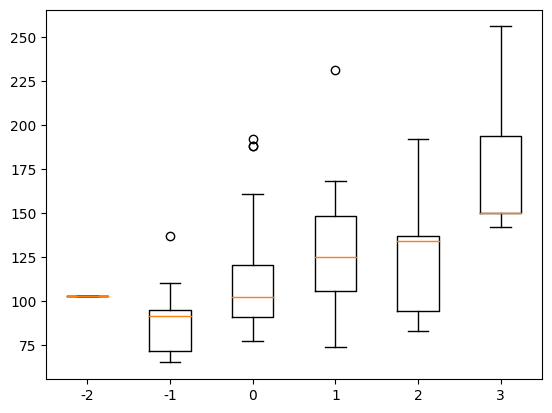

In [2]:
quick_check = auto_df[['symboling', 'normalized-losses']][auto_df['normalized-losses'] != '?']
quick_check['normalized-losses'] = quick_check['normalized-losses'].apply(int)

check_df = []

for val in range(-2, 4):
    check_df.append(quick_check[quick_check['symboling'] == val].loc[:, 'normalized-losses'])

plt.boxplot(check_df)
plt.xticks(range(1, 7), range(-2, 4))
plt.show()

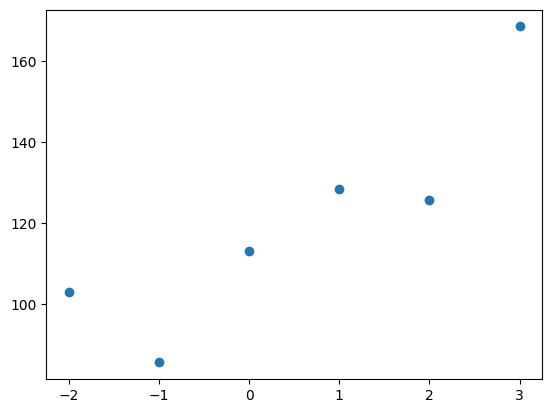

In [3]:
qc_grouped = quick_check.groupby('symboling').mean()
plt.scatter(qc_grouped.index, qc_grouped['normalized-losses'])
plt.show()

In [4]:
# Next we find out how many missing values there are.
auto_df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

There are no missing data in the sense of fields with no value. **But** I can see just from the head of the DF that some fields have '?' in them. So we need to look for other values that could be considered null.

In [5]:
for column in auto_df.columns:
    print(f"{column}: {auto_df[column].unique()}")

symboling: [ 3  1  2  0 -1 -2]
normalized-losses: ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type: ['gas' 'diesel']
aspiration: ['std' 'turbo']
num-of-doors: ['two' 'four' '?']
body-style: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels: ['rwd' 'fwd' '4wd']
engine-location: ['front' 'rear']
wheel-base: [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3 

Looking through these values, the only one that could be considered null is '?'. So we'll check for occurrences of '?' in all the columns.

In [6]:
contain_qms = [] # For keeping track of which columns are problematic.

print("Occurences of '?' among values:")
for column in auto_df.columns:
    count = list(auto_df[column]).count('?')
    if count > 0:
        contain_qms.append(column)
        print(f"{column}: {count}")

Occurences of '?' among values:
normalized-losses: 41
num-of-doors: 2
bore: 4
stroke: 4
horsepower: 2
peak-rpm: 2
price: 4


In [7]:
# Let's get a sense of proportion by asking how many rows this is out of.
len(auto_df.index)

205

In [8]:
# Are there any duplicates?
auto_df.drop_duplicates(keep = 'first', inplace = True)
len(auto_df.index)

205

There are no duplicates.

**Decision**: there are so many missing values for 'normalized-losses' that this column is not worth keeping. We will drop it. We also remove it from out list of problematic columns.

In [9]:
auto_df.drop('normalized-losses', axis = 1, inplace = True)
contain_qms.remove('normalized-losses')

#### Problems with type allocations

All the columns containing '?' values are formatted as string when they really should be int or float.

In [10]:
for column in contain_qms:
    print(f"{column}: {auto_df[column].dtype}")

num-of-doors: object
bore: object
stroke: object
horsepower: object
peak-rpm: object
price: object


These are the types that they ought to be, from looking as the values:

- num-of-doors: int
- bore: float
- stroke: float
- horsepower: int
- peak-rpm: int
- price: int

In [11]:
# num-of-doors has the additional issue that the numbers are given in words. So, we'll replace that.
auto_df['num-of-doors'].replace(['two', 'four'], [2, 4], inplace = True)

In [12]:
# For the other columns with '?' values we can cast to int or float.
# However, casting won't work with '?'. So, we need:
# 1. A function to leave '?' as is but cast to int the values that can be so cast.
def to_int(value):
    if value == '?':
        return value
    else:
        return int(value)

auto_df['horsepower'] = auto_df['horsepower'].apply(to_int)
auto_df['peak-rpm'] = auto_df['peak-rpm'].apply(to_int)
auto_df['price'] = auto_df['price'].apply(to_int)

In [13]:
# 2. A function to leave '?' as is but cast to float the values that can be so cast.
def to_float(value):
    if value == '?':
        return value
    else:
        return float(value)

auto_df['bore'] = auto_df['bore'].apply(to_float)
auto_df['stroke'] = auto_df['stroke'].apply(to_float)

In [14]:
# There's a similar issue with num-of-cylinders as there is with num-f-doors.
# We might want to make use of the number of cylinders AS a number, and we have to use replace to do that.
auto_df['num-of-cylinders'].replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'], [4, 6, 5, 3, 12, 2, 8], inplace = True)

### Analysis

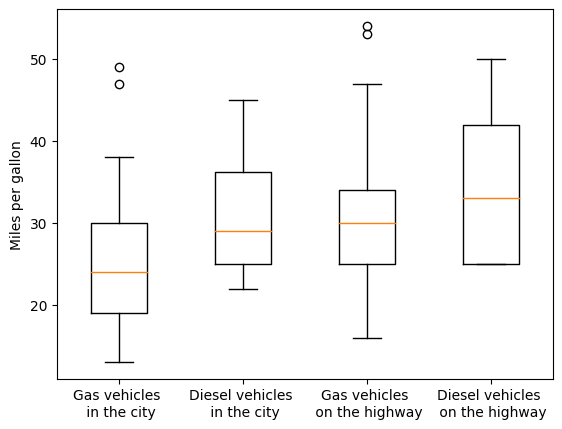

In [65]:
# Let's go ahead and do some plots; see what we can find.
# I'd like to compare petrol (gas) and diesel vehices for fuel efficiency.
gas_city_mpg = auto_df[auto_df['fuel-type'] == 'gas'].loc[:, 'city-mpg']
gas_highway_mpg = auto_df[auto_df['fuel-type'] == 'gas'].loc[:, 'highway-mpg']
diesel_city_mpg = auto_df[auto_df['fuel-type'] == 'diesel'].loc[:, 'city-mpg']
diesel_highway_mpg = auto_df[auto_df['fuel-type'] == 'diesel'].loc[:, 'highway-mpg']

mpg_data = [gas_city_mpg, diesel_city_mpg, gas_highway_mpg, diesel_highway_mpg]

plt.boxplot(mpg_data)
plt.ylabel('Miles per gallon')
plt.xticks([1, 2, 3, 4], ['Gas vehicles \n in the city', 'Diesel vehicles \n in the city', 'Gas vehicles \n on the highway', 'Diesel vehicles \n on the highway'])
plt.savefig('fuel_mpg.png', bbox_inches = 'tight')
plt.show()

In [16]:
# How well does engine size correlate with horsepower? We'll just drop the fiels for which we don't have a value.
engine_hp = auto_df[['engine-size', 'horsepower', 'num-of-cylinders']][auto_df['horsepower'] != '?']
len(engine_hp.index)

203

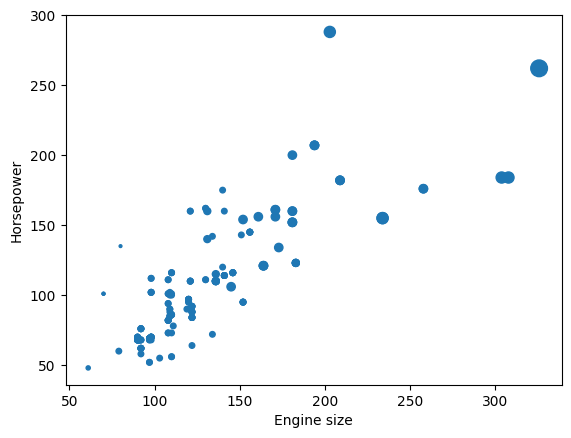

In [17]:
plt.scatter(engine_hp['engine-size'], engine_hp['horsepower'], s = engine_hp['num-of-cylinders'] ** 2)
plt.xlabel('Engine size')
plt.ylabel('Horsepower')
plt.savefig('es_performance.png', bbox_inches = 'tight')
plt.show()

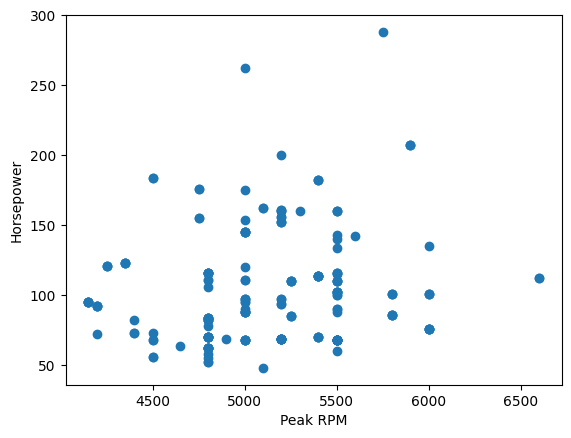

In [48]:
rpm_hp = auto_df[['peak-rpm', 'horsepower']][auto_df['horsepower'] != '?']
plt.scatter('peak-rpm', 'horsepower', data = rpm_hp)
plt.xlabel('Peak RPM')
plt.ylabel('Horsepower')
plt.show()

This lack of an assocation is rather surprising, given what I read here: https://www.roadandtrack.com/car-culture/a30443334/engine-stroke-vs-bore-explained/

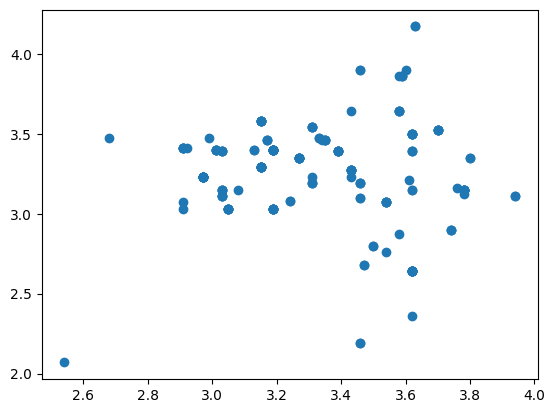

In [51]:
bore_stroke = auto_df[['bore', 'stroke']][auto_df['bore'] != '?']
plt.scatter('bore', 'stroke', data = bore_stroke)
plt.show()

Not much of an association, again.

C:\Users\MGotham\AppData\Local\Temp\ipykernel_25520\3573516011.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bore_rpm = bore_rpm[auto_df['peak-rpm'] != '?']


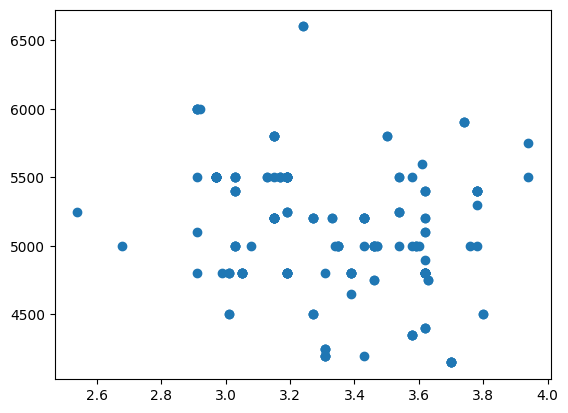

In [55]:
bore_rpm = auto_df[['bore', 'peak-rpm']][auto_df['bore'] != '?']
bore_rpm = bore_rpm[auto_df['peak-rpm'] != '?']
plt.scatter('bore', 'peak-rpm', data = bore_rpm)
plt.show()

C:\Users\MGotham\AppData\Local\Temp\ipykernel_25520\606988276.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bore_hp = bore_hp[auto_df['horsepower'] != '?']


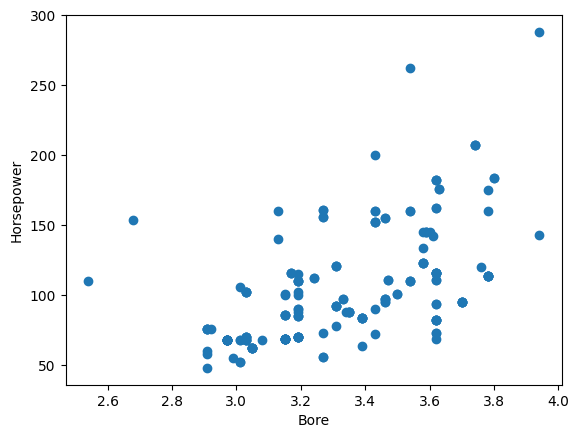

In [97]:
bore_hp = auto_df[['bore', 'horsepower']][auto_df['bore'] != '?']
bore_hp = bore_hp[auto_df['horsepower'] != '?']

plt.scatter('bore', 'horsepower', data = bore_hp)
plt.xlabel('Bore')
plt.ylabel('Horsepower')
plt.savefig('bore_hp.png', bbox_inches = 'tight')
plt.show()

C:\Users\MGotham\AppData\Local\Temp\ipykernel_25520\2828305910.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stroke_rpm = stroke_rpm[auto_df['peak-rpm'] != '?']


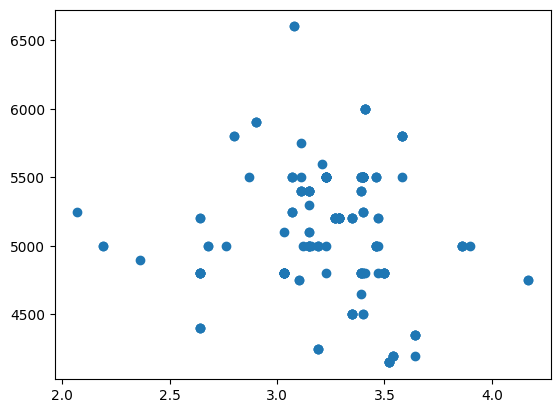

In [57]:
stroke_rpm = auto_df[['stroke', 'peak-rpm']][auto_df['stroke'] != '?']
stroke_rpm = stroke_rpm[auto_df['peak-rpm'] != '?']
plt.scatter('stroke', 'peak-rpm', data = stroke_rpm)
plt.show()

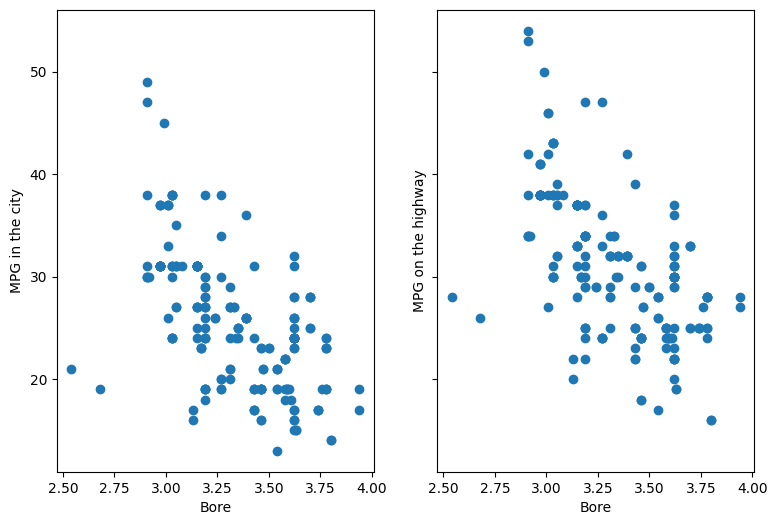

In [84]:
bore_mpg = auto_df[['bore', 'highway-mpg', 'city-mpg']][auto_df['bore'] != '?']

fig, (ax1, ax2) = plt.subplots(1,2, sharey = True, figsize = (9, 6))

ax1.scatter('bore', 'city-mpg', data = bore_mpg)
ax2.scatter('bore', 'highway-mpg', data = bore_mpg)

for ax in [ax1, ax2]:
    ax.set_xlabel('Bore')
    
ax1.set_ylabel('MPG in the city')
ax2.set_ylabel('MPG on the highway')

plt.savefig('bore_mpg.png', bbox_inches = 'tight')
plt.show()

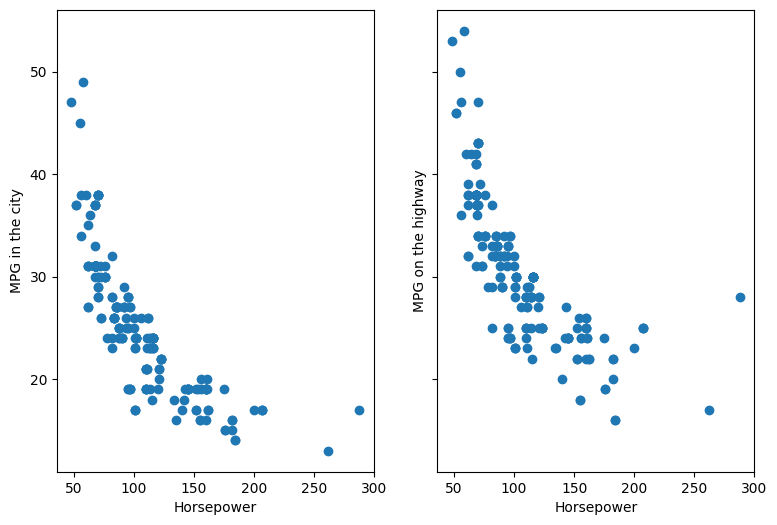

In [103]:
hp_mpg = auto_df[['horsepower', 'highway-mpg', 'city-mpg']][auto_df['horsepower'] != '?']

fig, (ax1, ax2) = plt.subplots(1,2, sharey = True, figsize = (9, 6))

ax1.scatter('horsepower', 'city-mpg', data = hp_mpg)
ax2.scatter('horsepower', 'highway-mpg', data = hp_mpg)

for ax in [ax1, ax2]:
    ax.set_xlabel('Horsepower')
    
ax1.set_ylabel('MPG in the city')
ax2.set_ylabel('MPG on the highway')

plt.savefig('hp_mpg.png', bbox_inches = 'tight')
plt.show()

In [18]:
cylinders_hp = auto_df[['num-of-cylinders', 'horsepower']][auto_df['horsepower'] != '?']
len(cylinders_hp.index)

203

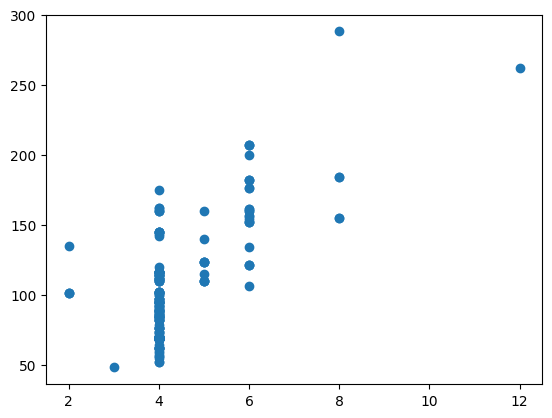

In [19]:
# A similar idea:
plt.scatter('num-of-cylinders', 'horsepower', data = cylinders_hp)
plt.show()

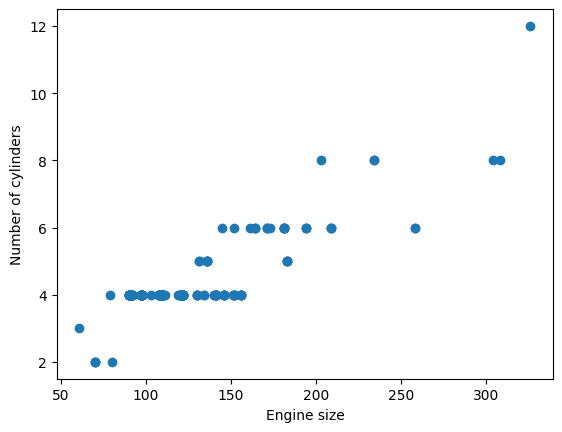

In [20]:
# A similar idea:
plt.scatter('engine-size', 'num-of-cylinders', data = engine_hp)

plt.xlabel('Engine size')
plt.ylabel('Number of cylinders')
plt.savefig('size_cylinders.png', bbox_inches = 'tight')
plt.show()

There's a good correlation here but there might be a better way to show it.

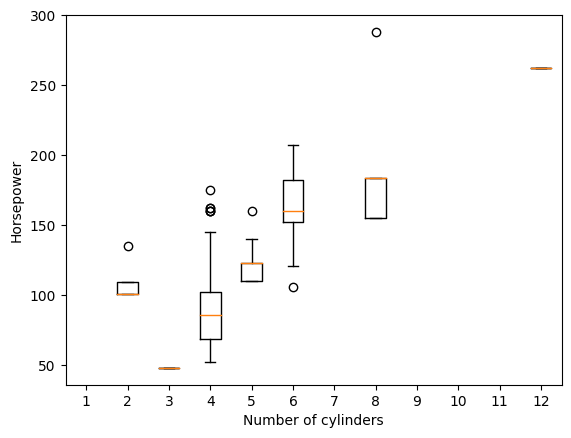

In [21]:
cylinders_hp_data = []

for number in range(1, 13):
    cylinders_hp_data.append(cylinders_hp[cylinders_hp['num-of-cylinders'] == number].loc[:, 'horsepower'])

plt.boxplot(cylinders_hp_data)
plt.xlabel('Number of cylinders')
plt.ylabel('Horsepower')
plt.show()

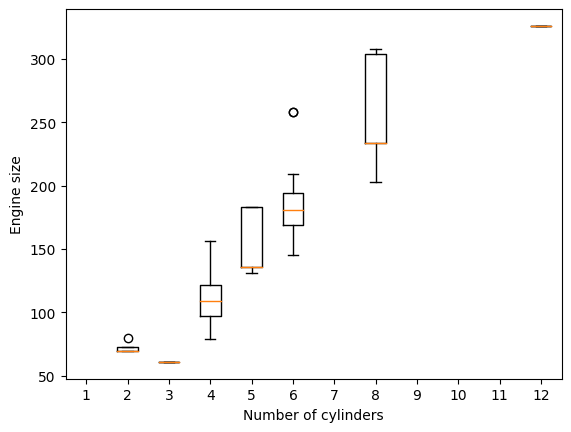

In [22]:
# Let's do the same thing for engine size.
cylinders_es_data = []

for number in range(1, 13):
    cylinders_es_data.append(auto_df[auto_df['num-of-cylinders'] == number].loc[:, 'engine-size'])

plt.boxplot(cylinders_es_data)
plt.xlabel('Number of cylinders')
plt.ylabel('Engine size')
plt.show()

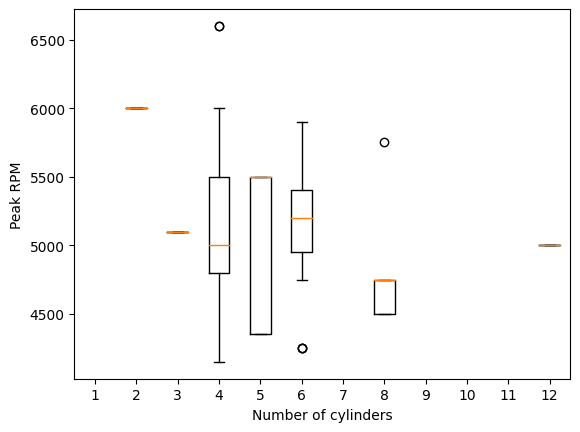

In [23]:
# Let's do the same thing for peak RPM.

cylinders_rpm = auto_df[['num-of-cylinders', 'peak-rpm']][auto_df['peak-rpm'] != '?']

cylinders_rpm_data = []

for number in range(1, 13):
    cylinders_rpm_data.append(cylinders_rpm[cylinders_rpm['num-of-cylinders'] == number].loc[:, 'peak-rpm'])

plt.boxplot(cylinders_rpm_data)
plt.xlabel('Number of cylinders')
plt.ylabel('Peak RPM')
plt.show()

In [24]:
drive_hp = auto_df[['drive-wheels', 'horsepower']][auto_df['horsepower'] != '?']
len(drive_hp.index)

203

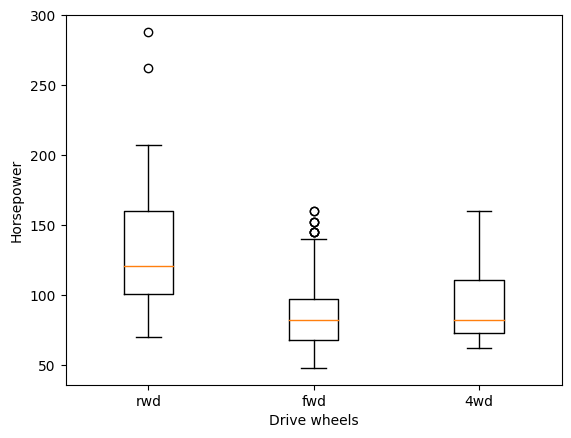

In [40]:
drive_hp_data = []

for drive in drive_hp['drive-wheels'].unique():
    drive_hp_data.append(drive_hp[drive_hp['drive-wheels'] == drive].loc[:, 'horsepower'])

plt.boxplot(drive_hp_data)
plt.xticks(range(1, 4), drive_hp['drive-wheels'].unique())
plt.ylabel('Horsepower')
plt.xlabel('Drive wheels')
plt.savefig('drive_hp.png', bbox_inches = 'tight')
plt.show()

Let's try to predict symboling, which, it turns out, is a risk category for insurance purposes: the higher the number, the bigger the risk. We'll see which of the following categorical variables correlates with it:

- aspiration
- body-style
- drive-wheels
- engine-location
- engine-type
- fuel-system

That's enough to be getting on with.

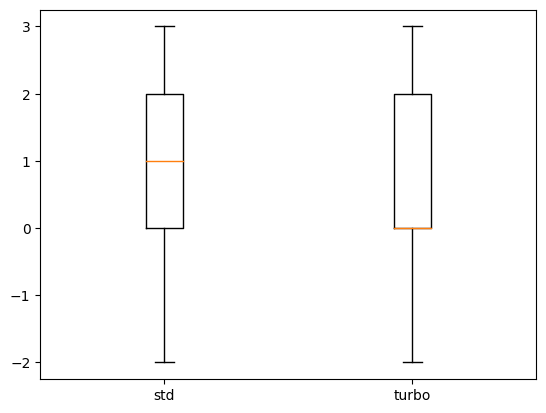

In [26]:
asp_symboling = []

for asp in auto_df['aspiration'].unique():
    asp_symboling.append(auto_df[auto_df['aspiration'] == asp].loc[:, 'symboling'])

plt.boxplot(asp_symboling)
plt.xticks([1, 2], auto_df['aspiration'].unique())
plt.show()

That's not particularly revelatory.

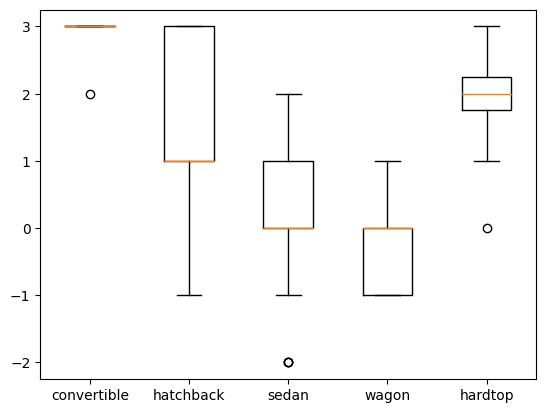

In [27]:
bstyle_symboling = []

for bstyle in auto_df['body-style'].unique():
    bstyle_symboling.append(auto_df[auto_df['body-style'] == bstyle].loc[:, 'symboling'])

plt.boxplot(bstyle_symboling)
plt.xticks(range(1, 6), auto_df['body-style'].unique())
plt.show()

Perhaps this is suggestive.

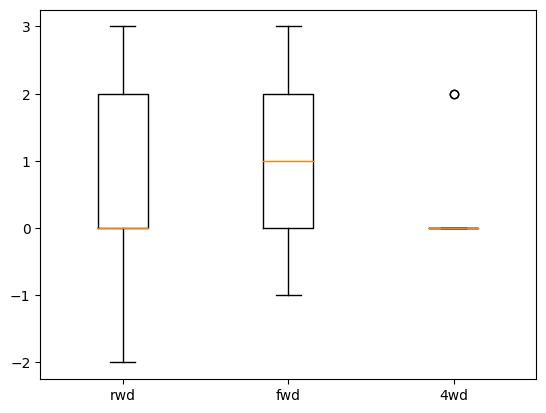

In [28]:
dwheels_symboling = []

for dwheels in auto_df['drive-wheels'].unique():
    dwheels_symboling.append(auto_df[auto_df['drive-wheels'] == dwheels].loc[:, 'symboling'])

plt.boxplot(dwheels_symboling)
plt.xticks(range(1, 4), auto_df['drive-wheels'].unique())
plt.show()

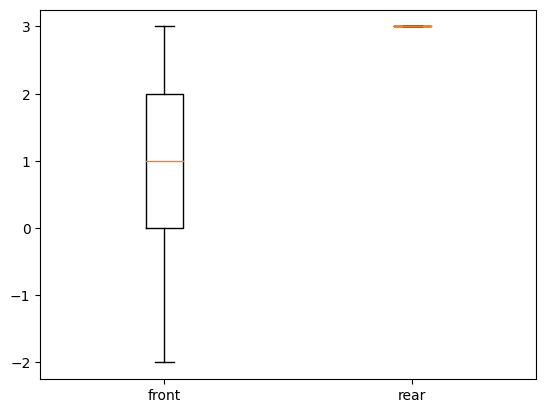

In [29]:
elocation_symboling = []

for elocation in auto_df['engine-location'].unique():
    elocation_symboling.append(auto_df[auto_df['engine-location'] == elocation].loc[:, 'symboling'])

plt.boxplot(elocation_symboling)
plt.xticks([1,2], auto_df['engine-location'].unique())
plt.show()

In [30]:
auto_df[auto_df['engine-location'] == 'rear']

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
126,3,porsche,gas,std,2,hardtop,rwd,rear,89.5,168.9,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528
127,3,porsche,gas,std,2,hardtop,rwd,rear,89.5,168.9,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028
128,3,porsche,gas,std,2,convertible,rwd,rear,89.5,168.9,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028


OK, finally we're onto something. Sort of.

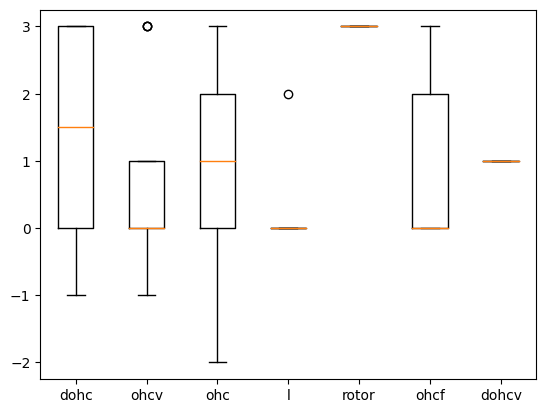

In [31]:
etype_symboling = []

for etype in auto_df['engine-type'].unique():
    etype_symboling.append(auto_df[auto_df['engine-type'] == etype].loc[:, 'symboling'])

plt.boxplot(etype_symboling)
plt.xticks(range(1, 8), auto_df['engine-type'].unique())
plt.show()

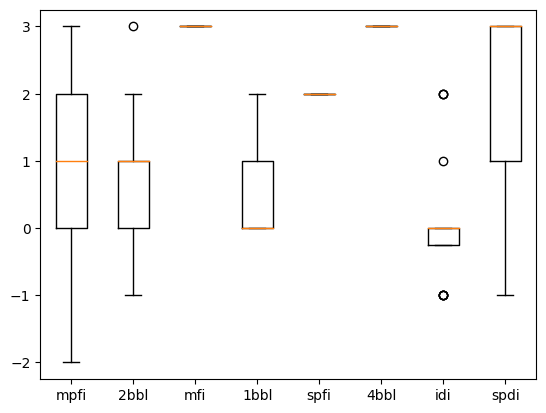

In [32]:
fsystem_symboling = []

for fsystem in auto_df['fuel-system'].unique():
    fsystem_symboling.append(auto_df[auto_df['fuel-system'] == fsystem].loc[:, 'symboling'])

plt.boxplot(fsystem_symboling)
plt.xticks(range(1, 9), auto_df['fuel-system'].unique())
plt.show()

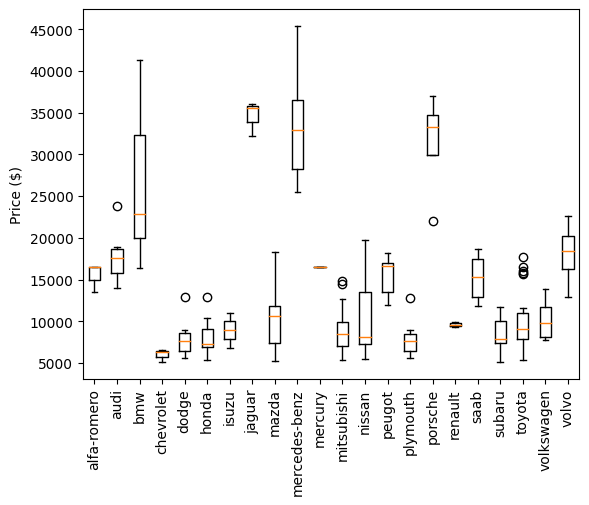

In [33]:
make_price_df = auto_df[['make', 'price']][auto_df['price'] != '?']

make_price = []

for make in make_price_df['make'].unique():
    make_price.append(make_price_df[make_price_df['make'] == make].loc[:, 'price'])

plt.boxplot(make_price)
plt.xticks(range(1, 23), make_price_df['make'].unique(), rotation = 90)
plt.ylabel('Price ($)')
plt.savefig('make_price.png', bbox_inches = "tight")
plt.show()

This is enough information to tell us which are the real luxury car makes in the data set:

- BMW
- Jaguar
- Mercedes Benz
- Porsche

Let's see what proportion of the market is made up by diesels vs. gas cars.

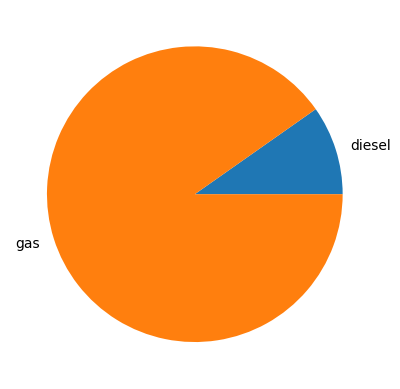

In [34]:
diesel_gas_count = auto_df.groupby('fuel-type').count()
plt.pie(diesel_gas_count.iloc[:,0], labels = diesel_gas_count.index)
plt.savefig('gas_diesel.png', bbox_inches = 'tight')
plt.show()

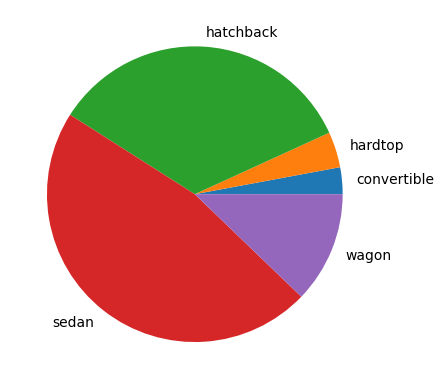

In [35]:
bstyle_count = auto_df.groupby('body-style').count()
plt.pie(bstyle_count.iloc[:,0], labels = bstyle_count.index)
plt.savefig('body_style.png', bbox_inches = 'tight')
plt.show()

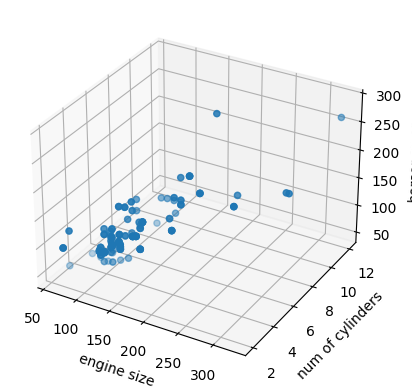

In [36]:
performance_df = auto_df[['engine-size', 'num-of-cylinders', 'horsepower']][auto_df['horsepower'] != '?']

fig = plt.figure()#figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D('engine-size', 'num-of-cylinders', 'horsepower', data = performance_df)
ax.set_xlabel('engine size')
ax.set_ylabel('num of cylinders')
ax.set_zlabel('horsepower')

plt.show()

### Price

C:\Users\MGotham\AppData\Local\Temp\ipykernel_25520\1822331252.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  price_hp = auto_df[['horsepower', 'price']][auto_df['horsepower'] != '?'][auto_df['price'] != '?']


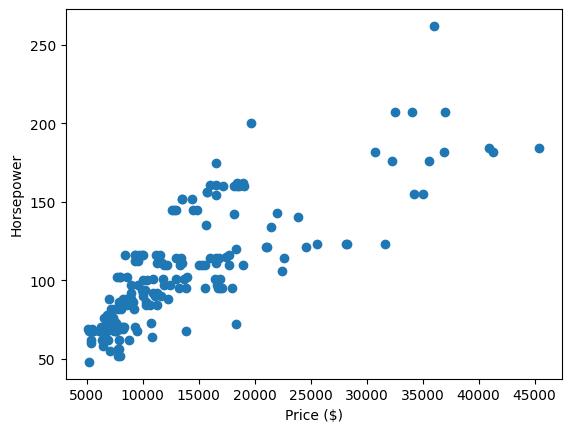

In [110]:
price_hp = auto_df[['horsepower', 'price']][auto_df['horsepower'] != '?'][auto_df['price'] != '?']

plt.scatter('price', 'horsepower', data = price_hp)
plt.xlabel('Price ($)')
plt.ylabel('Horsepower')
plt.savefig('price_hp.png', bbox_inches = 'tight')
plt.show()

In [130]:
x = sorted(auto_df['symboling'].unique())
x

[-2, -1, 0, 1, 2, 3]

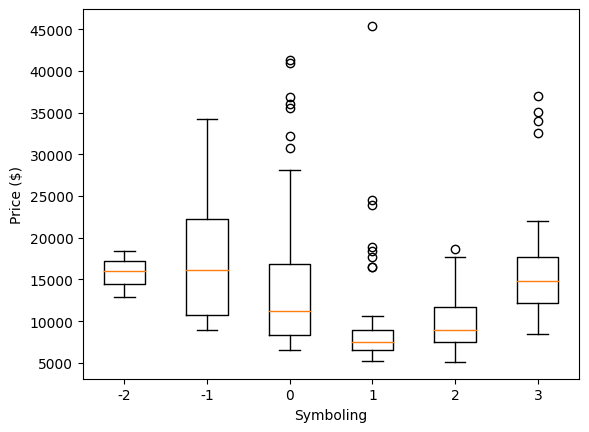

In [131]:
price_risk_df = auto_df[['symboling', 'price']][auto_df['price'] != '?']

price_risk = []
risks = sorted(price_risk_df['symboling'].unique())

for risk in risks:
    price_risk.append(price_risk_df[price_risk_df['symboling'] == risk].loc[:, 'price'])

plt.boxplot(price_risk)
plt.xticks(range(1, 7), risks)
plt.xlabel('Symboling')
plt.ylabel('Price ($)')
plt.savefig('price_risk.png', bbox_inches = "tight")
plt.show()

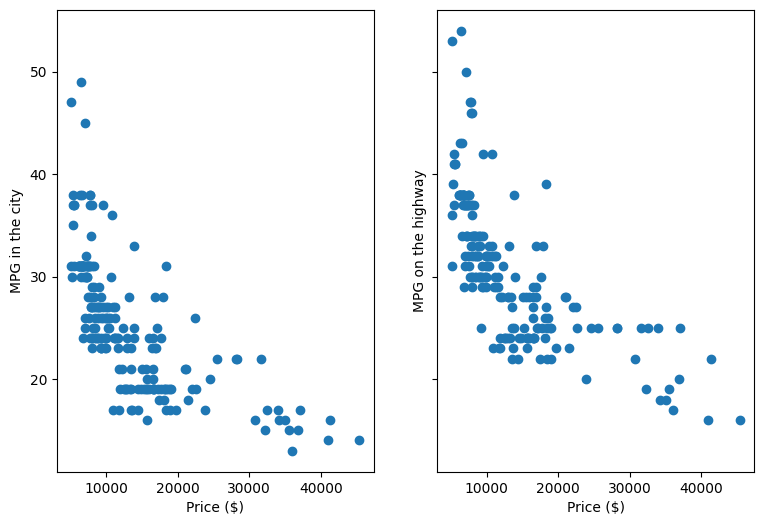

In [109]:
price_mpg = auto_df[['price', 'highway-mpg', 'city-mpg']][auto_df['price'] != '?']

fig, (ax1, ax2) = plt.subplots(1,2, sharey = True, figsize = (9, 6))

ax1.scatter('price', 'city-mpg', data = price_mpg)
ax2.scatter('price', 'highway-mpg', data = price_mpg)

for ax in [ax1, ax2]:
    ax.set_xlabel('Price ($)')
    
ax1.set_ylabel('MPG in the city')
ax2.set_ylabel('MPG on the highway')

plt.savefig('price_mpg.png', bbox_inches = 'tight')
plt.show()